<a href="https://colab.research.google.com/github/pirdausaziz/Stochastic-Gradient-Descent-Presentation/blob/main/present_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART 1 UNDERSTANDING STOCHASTIC GRADIENT DESCENT ALGORITHM**


# Definition

*   Stochastic Gradient Descent is **not a classifier**. It is actually an **optimizer** for the machine learning.  
*   This optimizer can **reduce time** to find the **minimum loss function** by performing **loss gradient**. The loss gradient can be obtained by using **the chain rule**.
*   The computation comes from Gradient Descent. Actually, the difference between Stochastic Gradient Descent and Gradient Descent is that Stochastic Gradient Descent takes **portion of randomized samples** to find the minimum loss. But for gradient descent **it iterates all the samples** and thus can cause prolong learning time.
*   By using Stochastic Gradient Descent, learning time can be reduced. It also can be applied in regression problem to optimize loss function

# Simple Demonstration on Gradient Descent on Linear Regression

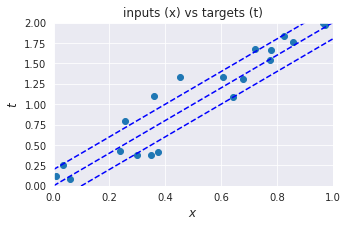

In [ ]:
import numpy as np  # Matrix and vector computation package
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Fancier plots

# Set seaborn plotting style
sns.set_style('darkgrid')
# Set the seed for reproducability
np.random.seed(seed=13)


# Define the vector of input samples as x, with 20 values 
# sampled from a uniform distribution between 0 and 1
x = np.random.uniform(0, 1, 20)

# Generate the target values t from x with small gaussian noise 
# so the estimation won't be perfect.
# Define a function f that represents the line that generates t 
# without noise.
def f(x): 
    return x * 2

# Create the targets t with some gaussian noise
noise_variance = 0.2  # Variance of the gaussian noise
# Gaussian noise error for each sample in x
noise = np.random.randn(x.shape[0]) * noise_variance
# Create targets t
t = f(x) + noise
#

# Plot the target t versus the input x
plt.figure(figsize=(5, 3))
plt.plot(x, t, 'o', label='$t$')
# Plot the initial line

plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.plot([0, 1], [f(-0.1), f(0.9)], 'b--', label='$f(x)$')
plt.plot([0, 1], [f(0.1), f(1.1)], 'b--', label='$f(x)$')

plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.axis((0, 1, 0, 2))
plt.title('inputs (x) vs targets (t)')
#plt.legend(loc=2)
plt.show()
#



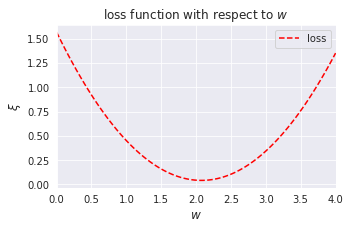

In [ ]:
def nn(x, w):
    """Output function y = x * w"""# equivalent to y = mx +C , C=0
    return x * w


def loss(y, t):
    """MSE loss function"""
    return np.mean((t - y)**2)

# Plot the loss vs the given weight w

# Vector of weights for which we want to plot the loss
ws = np.linspace(0, 4, num=100)  # weight values
# loss for each weight in ws

# anws = np.vectorize(lambda w: loss(nn(x, w) , t))
loss_ws = np.vectorize(lambda w: loss(nn(x, w) , t))(ws)

# Plot
plt.figure(figsize=(5, 3))
plt.plot(ws, loss_ws, 'r--', label='loss')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('loss function with respect to $w$')
plt.xlim(0, 4)
plt.legend()
plt.show()
#



gradient 1 : 1.2342
gradient 2 : 0.4483
gradient 3 : 0.1629
gradient 4 : 0.0592
gradient 5 : 0.0215
gradient 6 : 0.0078
gradient 7 : 0.0028
gradient 8 : 0.0010
w(0): 0.1380 	 loss: 1.3710
w(1): 1.3722 	 loss: 0.2174
w(2): 1.8205 	 loss: 0.0651
w(3): 1.9834 	 loss: 0.0451
w(4): 2.0426 	 loss: 0.0424
w(5): 2.0640 	 loss: 0.0420
w(6): 2.0719 	 loss: 0.0420
w(7): 2.0747 	 loss: 0.0420
w(8): 2.0757 	 loss: 0.0420


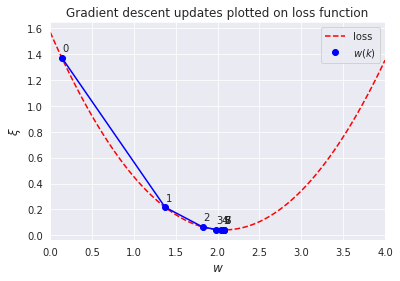

In [ ]:
def gradient(w, x, t):
    """Gradient function. (Remember that y = nn(x, w) = x * w)"""
    return 2 * x * (nn(x, w) - t)


def delta_w(w_k, x, t, learning_rate):
    """Update function delta w"""
    return learning_rate * np.mean(gradient(w_k, x, t))

# Set the learning rate
learning_rate = 0.9 # 2.5 or less than 1

nb_of_iterations = 8  # number of gradient descent updates

# Initial weight parameter
w = np.random.rand()

# Perform the gradient descent updates, and print the weights and loss:


w_loss = [(w, loss(nn(x, w), t))] # Keep track of weight and loss values
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # Delta w update
    print(f'gradient {i+1} : {abs(dw):.4f}')
    w = w - dw  # Update the current weight parameter
    w_loss.append((w, loss(nn(x, w), t)))  # Save weight and loss

# Print the final w, and loss
for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')
    
# Visualise the gradient descent updates
plt.figure(figsize=(6, 4))
plt.plot(ws, loss_ws, 'r--', label='loss')  # Loss curve
# Plot the updates
for i in range(0, len(w_loss)-1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.05, f'${i}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.05, f'${i+1}$')
# Show figure
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Gradient descent updates plotted on loss function')
plt.xlim(0, 4)
plt.legend(loc=1)
plt.show()
#

# **PART 2 - SGD OPTIMIZER WITH LOGISTIC CLASSIFIER PROJECT**



In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')

os.chdir('/content/drive/MyDrive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#import necessary modules and data
from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import *
from io import StringIO
import sys#
import matplotlib.pyplot as plt

old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Water Quality.csv', index_col=False)

X = df.values[:,:3]
y = df.values[:,3]
y = y.reshape(-1, 1)


In [ ]:
# data standardization
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
df_train = np.append(X_test, y_test, axis=1)
# Inserting column name
df_train = pd.DataFrame(df_train)
df_train.columns = ['Ec value(ms/cm)', 'pH Value','TDS Value(ppm)','Label']

In [ ]:
# CLASSIFICATION USING LOG REGRESSION LOSS
clf = SGDClassifier(loss="log", penalty=None, learning_rate='constant', eta0=0.1, verbose=1)
clf.n_iter = np.ceil(10**6 / len(y))
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty=None,
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=1, warm_start=False)

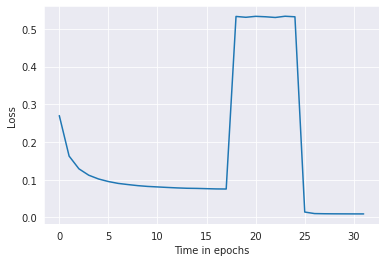

In [ ]:
# PRINT LOSS FUNCTION
sys.stdout = old_stdout
loss_history = mystdout.getvalue()

loss_list = []

for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs"); plt.ylabel("Loss")
plt.show()

In [ ]:
# predict the test dataset
predict_y = clf.predict(X_test)
predict_yr = predict_y.reshape(-1, 1)
prob_y  = clf.predict_proba(X_test)

In [ ]:
# highlighting errors and success sample from the test dataset
output_name = df_train.columns[3]

errors = df_train[df_train[output_name] != predict_y]
accurate = df_train[df_train[output_name] == predict_y]

In [ ]:
print('total of error=', len(errors))
errors

total of error= 24


,Ec value(ms/cm),pH Value,TDS Value(ppm),Label
96,-1.155171,-1.007871,-0.630440,2.0
208,-0.592348,-0.567054,-0.999745,2.0
395,-0.797445,-0.820289,-0.752273,2.0
501,-0.642430,-0.735877,-0.622826,3.0
691,-0.642430,-0.632708,-0.737044,1.0
697,-0.642430,-0.726498,-0.622826,3.0
847,-0.642430,-0.979734,-0.607597,2.0
856,-0.642430,-1.036008,-0.634247,2.0
978,-0.592348,-1.045387,-0.622826,2.0
1019,-1.052623,-1.017250,-0.877912,2.0


In [ ]:
print('total of accurate=', len(accurate))
accurate

total of accurate= 2136


,Ec value(ms/cm),pH Value,TDS Value(ppm),Label
0,-0.744978,-0.651466,-0.702778,1.0
1,1.406152,1.702684,1.471171,3.0
2,-0.797445,-0.829668,-0.729429,1.0
3,1.508700,1.290004,1.539701,3.0
4,1.356070,1.374416,1.410254,3.0
...,...,...,...,...
2155,-0.642430,-0.613949,-0.577138,2.0
2156,-0.744978,-0.829668,-0.737044,1.0
2157,1.406152,1.440069,1.410254,3.0
2158,-0.642430,-0.416989,-0.607597,2.0


              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       709
         2.0       0.99      0.98      0.98       719
         3.0       1.00      0.99      1.00       732

    accuracy                           0.99      2160
   macro avg       0.99      0.99      0.99      2160
weighted avg       0.99      0.99      0.99      2160



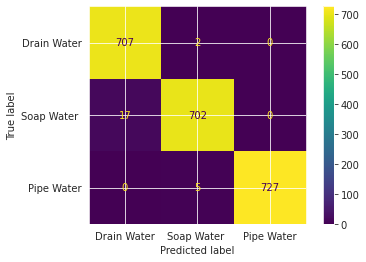

In [ ]:
cm = confusion_matrix(y_test, predict_y)

labels = ['Drain Water', 'Soap Water ', 'Pipe Water']

print(classification_report(y_test, predict_y))
ConfusionMatrixDisplay(cm, display_labels=labels).plot(values_format = '')

In [ ]:
print(classification_report(y_test, predict_y))

# **APPENDIX**

**LOSS FUNCTION OF LOGISTIC REGRESSION BY USING GRADIENT DESCENT AS OPTIMIZER**

In [ ]:
#IMPORTING TITANIC DATASET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X_train = pd.read_csv("train_X.csv")
Y_train = pd.read_csv("train_Y.csv")

X_test = pd.read_csv("test_X.csv")
Y_test = pd.read_csv("test_Y.csv")

In [ ]:
X_train

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,886,2,0,27.0,0,0,13.0000,1
887,887,1,1,19.0,0,0,30.0000,1
888,888,3,1,20.0,1,2,23.4500,1
889,889,1,0,26.0,0,0,30.0000,0


In [ ]:
Y_train

,Id,Survived
0,0,0
1,1,1
2,2,1
3,3,1
4,4,0
...,...,...
886,886,0
887,887,1
888,888,0
889,889,1


In [ ]:
X_test

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,1
2,2,2,0,62.0,0,0,9.6875,2
3,3,3,0,27.0,0,0,8.6625,1
4,4,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,413,3,0,NaN,0,0,8.0500,1
414,414,1,1,39.0,0,0,108.9000,0
415,415,3,0,38.5,0,0,7.2500,1
416,416,3,0,NaN,0,0,8.0500,1


In [ ]:
Y_test

,Id,Survived
0,0,0
1,1,1
2,2,0
3,3,0
4,4,1
...,...,...
413,413,0
414,414,1
415,415,0
416,416,0


In [ ]:
#removing ID variable
X_train = X_train.drop("Id", axis = 1)
Y_train = Y_train.drop("Id", axis = 1)
X_test = X_test.drop("Id", axis = 1)
Y_test = Y_test.drop("Id", axis = 1)

X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [ ]:
#FUNCTION DECLARATION
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    W_list = []
    B_list = []
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        W_list.append(dW.mean())
        B_list.append(dB.mean())
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, W_list, B, B_list, cost_list, Z, A

cost after  0 iteration is :  0.6931471805599454
cost after  10000 iteration is :  0.6295686409430729
cost after  20000 iteration is :  0.6274436493068999
cost after  30000 iteration is :  0.6268214767445494
cost after  40000 iteration is :  0.6262758152575622
cost after  50000 iteration is :  0.6257402517931562
cost after  60000 iteration is :  0.6252112056071689
cost after  70000 iteration is :  0.624688381844937
cost after  80000 iteration is :  0.6241716634458006
cost after  90000 iteration is :  0.6236609444737222


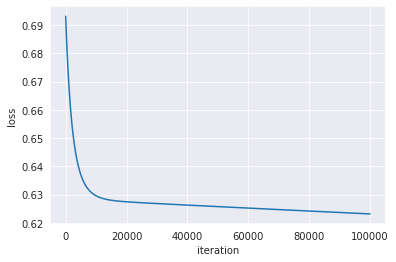

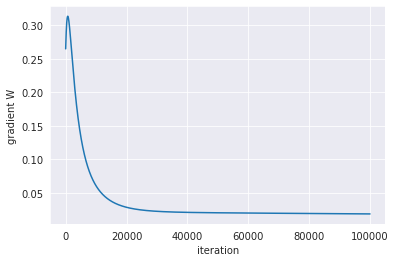

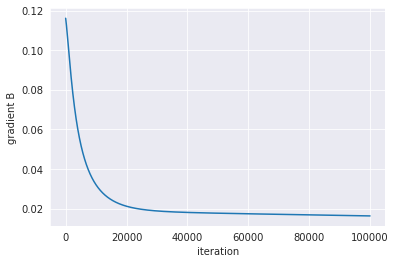

In [ ]:
#GRADIENT DESCENT
iterations = 100000
learning_rate = 0.0000015
W, W_list, B, B_list, cost_list, eq, sig = model(
    X_train, Y_train, learning_rate = learning_rate, 
    iterations = iterations)

plt.plot(np.arange(iterations), cost_list)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

plt.plot(np.arange(iterations), W_list)
plt.xlabel('iteration')
plt.ylabel('gradient W')
plt.show()

plt.plot(np.arange(iterations), B_list)
plt.xlabel('iteration')
plt.ylabel('gradient B')
plt.show()

In [ ]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")
    
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  65.55 %
